# Exercise set 1: Least squares regression

This exercise focuses on practical applications of least squares regression with Python. You will learn how to apply least squares regression to fit models of different kinds and how to evaluate the results.

**Learning Objectives:**

After completing this exercise set, you will be able to:

* Apply ordinary least squares regression to fit a linear model to data, using [NumPy](https://numpy.org/), [SciPy](https://scipy.org/), [scikit-learn](https://scikit-learn.org/), and [statsmodels](https://www.statsmodels.org/).
* Compare the quality of different regression models by inspecting their residuals.
* Estimate errors for coefficients by obtaining their confidence intervals.
* Apply weighting to data points in least squares regression.
* Use non-linear least squares regression.


**To get the exercise approved, complete the following problems:**

- [1.1(c)](#1.1(c)) and [1.1(d)](#1.1(d)): Ordinary least squares regression and comparison of quality by residuals.
- [1.2(d)](#1.2(d)) and [1.2(e)](#1.2(e)): Weighted least squares regression and how to obtain confidence intervals for regression parameters.
- [1.3(b)](#1.3(b)): Non-linear least squares regression.

## Exercise 1.1: Polynomial regression with least squares

The temperature (°C) is measured continuously over time at a high altitude
in the atmosphere using a
weather balloon. Every hour a measurement is made and sent to an onboard computer.
The measurements are 
shown in Fig. 1 and can be found in [the data file](temperature.csv) (located at 'temperature.csv').

<figure>
<img src="Fig_1_1.png" width="50%">
<figcaption><p style='text-align: center;'><b>Fig. 1:</b> Measured temperature as a function of time.</p></figcaption> 
</figure>

### 1.1(a)

To model the temperature ($y$) as a function of the time ($x$), we choose a second-order polynomial:

\begin{equation}
y = b_0 + b_1 x + b_2 x^2.
\end{equation}

Explain how you can formulate this on a form suitable for least-squares regression,
$\mathbf{y} = \mathbf{X} \mathbf{b}$. That is:

1. What do the vectors $\mathbf{y}$ and $\mathbf{b}$ contain? 
<span style="color: lightgreen;"> 
    $\mathbf{y}$ contains the measured values for the dependent variable, i.e., the temperature, while $\mathbf{b}$ contains the parameters that result from the fitting procedure. 
</span>

2. What does the matrix $\mathbf{X}$ contain?
<span style="color: lightgreen;"> 
    $\mathbf{X}$ contains the measured values for the independent variable, i.e., the time. 
</span>

#### Your answer to question 1.1(a): What are $\mathbf{y}$,  $\mathbf{b}$, and $\mathbf{X}$?

1. <span style="color: lightgreen;"> $\mathbf{y}$ contains the measured values for the dependent variable, i.e., the temperature, while $\mathbf{b}$ contains the parameters that result from the fitting procedure. </span>

2. <span style="color: lightgreen;"> $\mathbf{X}$ contains the measured values for the independent variable, i.e., the time. </span>

### 1.1(b)

Fit a second-order polynomial model,

\begin{equation}
y = b_0 + b_1 x + b_2 x^2 ,
\end{equation}

to the given data by making use of [numpy.polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) from [NumPy](https://numpy.org/). 

1. Obtain the parameters $b_0$, $b_1$, and $b_2$.
2. Plot your model: Create a scatter plot of the original data points. Overlay a line plot of the fitted quadratic model on the same graph.
3. Calculate the [residuals](https://en.wikipedia.org/wiki/Errors_and_residuals) and create a scatter plot of the residuals against the fitted values. 
4. Based on your results, how do you assess your model? Please see [What is Considered a Good vs. Bad Residual Plot?](https://www.statology.org/good-vs-bad-residual-plot/) for a short explanation of what to look for in the residual plot.

Below, you will find some code to get you started:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Styling for plots:
sns.set_theme(style="ticks", context="notebook", palette="colorblind")

# For showing matplotlib in jupyter:
# (you can experiment with replacing "inline" with "notebook")
%matplotlib inline

In [2]:
# Load the raw data
data = pd.read_csv("temperature.csv")
data.head()

,hour,temperature
0,1,31.312231
1,2,25.648250
2,3,18.575565
3,4,27.077625
4,5,14.760071


To fit a polynomial to your data, you have several options. Here are three popular choices:

1. [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) from [NumPy](https://numpy.org/). This is the simplest option, suitable for most basic polynomial fitting tasks. It uses a least squares approach to fit a polynomial of a given degree to your data. 
2. [Ordinary least squares (OLS)](https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html) from [statsmodels](https://www.statsmodels.org): This method provides more detailed results than polyfit, including error estimates for the coefficients. It's a good choice if you need more information about the fit. 
3. [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from [scikit-learn](https://scikit-learn.org/): This is a more general approach that can be used for a variety of regression tasks, including polynomial fitting. It's particularly useful if you want to combine polynomial fitting with other methods, such as cross-validation.

For options 2 and 3, we have to "construct" the $\mathbf{X}$-matrix (see [1.1(a)](#1.1(a))), while `polyfit` will do this for us. We select the simplest option and use `polyfit` in this exercise. Here is one example for finding a first-order polynomial to get you started:

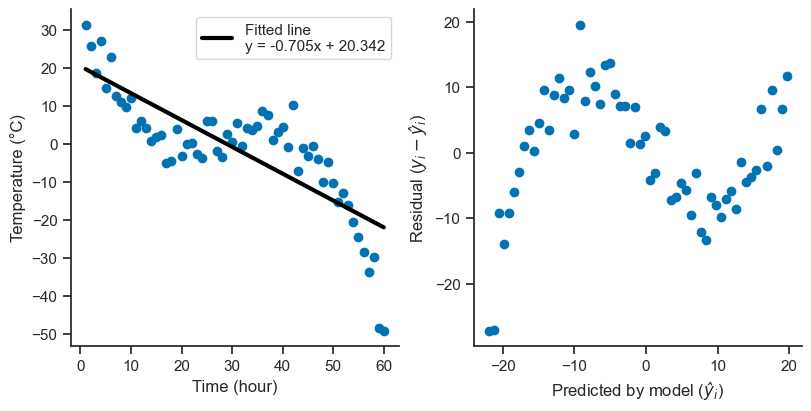

In [3]:
x = data["hour"]
y = data["temperature"]
param = np.polyfit(x, y, deg=1)  # Selects a second order polynomial

# param now contains the parameters:
equation = f"y = {param[0]:.3f}x + {param[1]:.3f}"

# To evaluate the polynomial, we use np.polyval:
y_hat = np.polyval(param, x)

# And we can find the residuals/errors
residual = y - y_hat

# Plot the fitted polynomial and residuals
fig, (ax1, ax2) = plt.subplots(
    constrained_layout=True, ncols=2, figsize=(8, 4)
)
ax1.scatter(data["hour"], data["temperature"])
ax1.set(xlabel="Time (hour)", ylabel="Temperature (°C)")
ax1.plot(x, y_hat, lw=3, color="black", label=f"Fitted line\n{equation}")
ax1.legend()
ax2.scatter(y_hat, residual)
ax2.set(xlabel="Predicted by model ($ŷ_i$)", ylabel="Residual ($y_i - ŷ_i$)")
sns.despine(fig=fig)

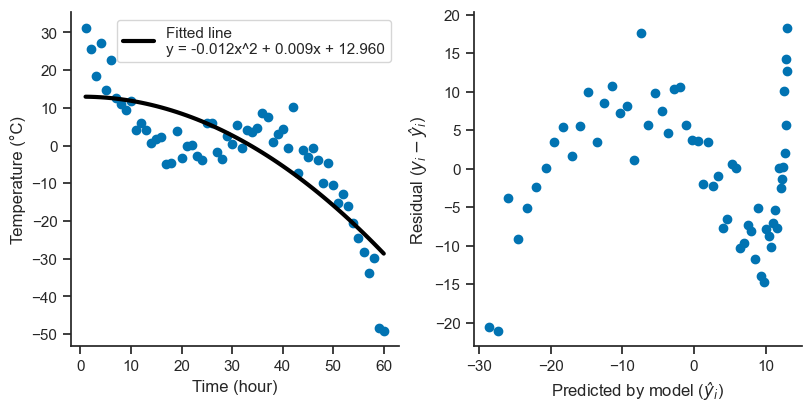

In [4]:
# Your code here for fitting the model, plotting it, and the residuals
x = data["hour"]
y = data["temperature"]
param, res, _, _, _ = np.polyfit(x, y, deg=2, full=True) # Selects a second order polynomial

# param now contains the parameters:
equation = f"y = {param[0]:.3f}x^2 + {param[1]:.3f}x + {param[2]:.3f}"

# To evaluate the polynomial, we use np.polyval:
y_hat = np.polyval(param, x) # y_hat is the predicted value of y, calculated using b_hat (param) and x 

# And we can find the residuals/errors
residual = y - y_hat

# Plot the fitted polynomial and residuals
fig2, (ax1, ax2) = plt.subplots(
    constrained_layout=True, ncols=2, figsize=(8, 4)
)
ax1.scatter(data["hour"], data["temperature"])
ax1.set(xlabel="Time (hour)", ylabel="Temperature (°C)")
ax1.plot(x, y_hat, lw=3, color="black", label=f"Fitted line\n{equation}")
ax1.legend()
ax2.scatter(y_hat, residual)
ax2.set(xlabel="Predicted by model ($ŷ_i$)", ylabel="Residual ($y_i - ŷ_i$)")
sns.despine(fig=fig2)

In [5]:
print(param[::-1])

[ 1.29603071e+01  9.09512591e-03 -1.17103779e-02]


#### Your answer to question 1.1(b): What are the coefficients of the second-order polynomial and how do you assess (based on the two plots you made) your model?

<span style="color: lightgreen;"> 

The coefficients in $y = b_0 + b_1 x + b_2 x^2$ are $[b_0, b_1, b_2]$ = `param[::-1]`= [1.29603071e+01, 9.09512591e-03, -1.17103779e-02]

There is a clear (3rd order polynomial) pattern in the residuals $\Rightarrow$ bad residual plot = bad model 

</span>

### 1.1(c)

In this problem, you will explore how the choice of polynomial order affects the model's ability to fit the temperature data.

1. Extend your code from [1.1(b)](#1.1(b)) to fit polynomial models of orders 1 to 5 to the temperature data.
2. Plot the fitted curves for all models together with the raw data on the same graph (time vs. temperature).
3. Plot the residuals for each model in separate scatter plots.

Which polynomial order best models temperature as a function of time?

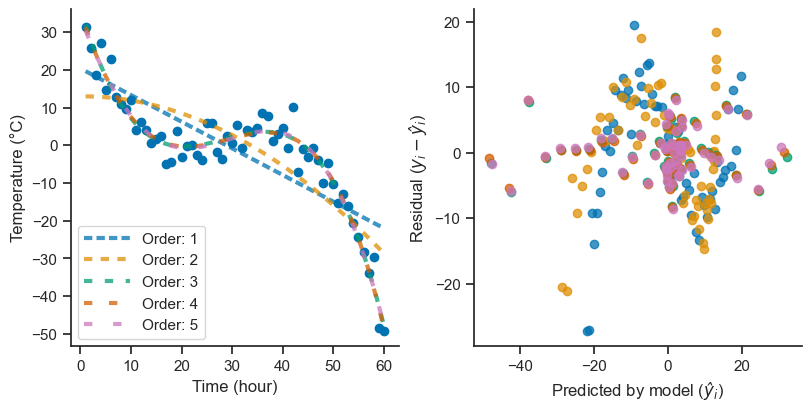

In [6]:
# Your code here for fitting the model, plotting it, and the residuals
x = data["hour"]
y = data["temperature"]

# Plot the fitted polynomial and residuals
fig, (ax1, ax2) = plt.subplots(
    constrained_layout=True, ncols=2, figsize=(8, 4)
) 
ax1.scatter(data["hour"], data["temperature"])
ax1.set(xlabel="Time (hour)", ylabel="Temperature (°C)")
ax2.set(xlabel="Predicted by model ($ŷ_i$)", ylabel="Residual ($y_i - ŷ_i$)")

for order in range(1, 6): 
    param, res, _, _, _ = np.polyfit(x, y, deg=order, full=True) 
    y_hat = np.polyval(param, x) 
    residual = y - y_hat
    
    l, = ax1.plot(x, y_hat, lw=3, label=f"Order: {order}", alpha=0.75, ls=(0,(2,order)))
    ax2.scatter(y_hat, residual, c=[l.get_color()], alpha=0.75) 

sns.despine(fig=fig)
ax1.legend(handlelength=3) 

#### Your answer to question 1.1(c): Which polynomial order best models temperature as a function of time?

<span style="color: lightgreen;"> 

Order 3, because this is the polynomial of lowest order which gives residuals woth not pattern or increaeing/decreasing trend (what ypu would called random). 

</span>

### 1.1(d)
Obtain the sum of squared residuals for each polynomial you made in [1.1(c)](#1.1(c)) and plot this as a function of the
polynomial degree. Use this plot to determine (from visual inspection) the best polynomial
order for modelling the temperature as a function of time. Does this agree with your
assessment from [1,1(c)](#1.1(c))?

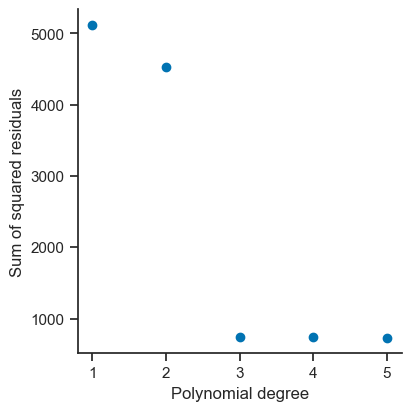

In [7]:
# Your code here for fitting the model, plotting it, and the residuals
x = data["hour"]
y = data["temperature"]

# Plot the fitted polynomial and residuals
fig, ax = plt.subplots(
    constrained_layout=True, figsize=(4, 4)
) 
ax.set(xlabel="Polynomial degree", ylabel="Sum of squared residuals")

residuals = [] 
for order in range(1, 6): 
    param, res, _, _, _ = np.polyfit(x, y, deg=order, full=True) 
    residuals.append(res[0]) 

ax.scatter([range(1,6)], residuals) 
sns.despine(fig=fig)

#### Your answer to question 1.1(d): What polynomial order do you recommend?

<span style="color: lightgreen;"> 

Still order 3, because there is litle to no further improvement beyond this. 

</span>

## Exercise 1.2: Weighted least squares

In this exercise, we will use least squares regression to investigate a real-world phenomenon: the decay of beer froth over time. This is to demonstrate the application of regression in the study of a physical phenomenon to obtain a physical quantity (in this case a characteristic time for the decay). 

Arnd Leike was awarded the 2002 [Ig Nobel prize](https://en.wikipedia.org/wiki/Ig_Nobel_Prize) for this [research on the decay of beer froth](https://doi.org/10.1088/0143-0807/23/1/304), and we will here reproduce the data analysis. In particular, we will use the reported raw data and carry out a weighted least squares regression. In addition, we will also obtain an error estimate (as a confidence interval) for the determined physical quantity.


The file [erdinger.csv](erdinger.csv)
contains [measured heights](https://doi.org/10.1088/0143-0807/23/1/304) for beer
froth as a function of time, along with the errors in the measured heights. 


**Please use [scikit-learn](https://scikit-learn.org/) and [startsmodels](https://www.statsmodels.org) for the fitting in this exercise!**

### 1.2(a)
Create a linear model (first-order polynomial) for the beer froth height as a function of time using least squares.
Plot your model with the raw data, calculate the [coefficient of determination ($R^2$)](https://en.wikipedia.org/wiki/Coefficient_of_determination), and plot
the residuals. Is this linear model suitable for estimating the froth height as a function of time?

**Note:** You do not need to add code for this part, but make sure that you understand what it does.

In [8]:
# Here is some code to get you started:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Styling for plots:
sns.set_theme(style="ticks", context="notebook", palette="colorblind")

# For showing matplotlib in jupyter:
# (you can experiment with replacing "inline" with "notebook")
%matplotlib inline

data = pd.read_csv("erdinger.csv")
data.head()

,time,height,height-error
0,0,17.0,0.0
1,15,16.1,0.3
2,30,14.9,0.4
3,45,14.0,0.4
4,60,13.2,0.4


In [9]:
time = data["time"].to_numpy()
height = data["height"].to_numpy()
height_error = data["height-error"].to_numpy()

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# To fit a model with scikit-learn we do the following:
model1 = LinearRegression(fit_intercept=True)
X = time.reshape(-1, 1)
model1.fit(X, height)

# We can use the model for prediction by:
y_hat_1 = model1.predict(X)

# To calculate R²:
r2_model1 = model1.score(X, height)
# or:
r2_model1 = r2_score(height, y_hat_1)

# We can calculate the mean squared error (MSE) for the model:
mse_model1 = mean_squared_error(height, y_hat_1)
# Summarize the model with some short text:
model1_txt = f"y = {model1.coef_[0]:.3g}x + {model1.intercept_:.3g}"
model1_txt = f"{model1_txt}\n(R² = {r2_model1:.3g}, MSE = {mse_model1:.3g})"
print(model1_txt)

y = -0.0321x + 15.4
(R² = 0.944, MSE = 0.657)


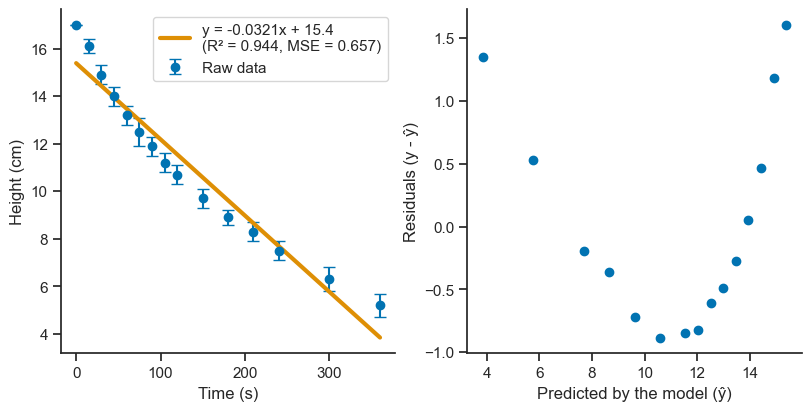

In [11]:
fig, (ax1, ax2) = plt.subplots(
    constrained_layout=True, ncols=2, figsize=(8, 4)
)
ax1.errorbar(
    time,
    height,
    yerr=height_error,
    label="Raw data",
    fmt="o",  # Just show the symbols and no lines
    capsize=4,  # Size of end of the error bars
)
ax1.plot(
    time,
    y_hat_1,
    lw=3,
    label=model1_txt,
)
ax1.set(xlabel="Time (s)", ylabel="Height (cm)")
ax1.legend()

ax2.scatter(y_hat_1, height - y_hat_1)
ax2.set(xlabel="Predicted by the model (ŷ)", ylabel="Residuals (y - ŷ)")
sns.despine(fig=fig)

#### Your answer to question 1.2(a): Is this linear model suitable for estimating the froth height as a function of time?

<span style="color: lightgreen;"> 

No

</span>

### 1.2(b)
If we assume that the change in froth volume is proportional
to the volume present at any given time, we can show that this leads to
exponential decay of the froth height,

\begin{equation}
\frac{h(t)}{h(0)} = \exp \left(-\frac{t}{\tau} \right),
\end{equation}

where $h(t)$ is the height of the froth as a function of time $t$, and $\tau$ is a parameter.
We will assume that $h(0)$ is a known parameter, equal to the initial height of the froth.

Show how you can transform the equation above to a linear equation of the form,

\begin{equation}
y = b x,
\end{equation}

and express $b, x, y$ in terms of $h, h(0), t, \tau$.

#### Your answer to question 1.2(b):
<span style="color: lightgreen;"> 

\begin{align*}

\frac{h(t)}{h(0)} &= \exp \left(-\frac{t}{\tau} \right) \\ 
\ln{h(t)} &= -t \times \frac{1}{\tau} + \ln{h(0)} \\ 

\end{align*}

$\to y \equiv h(t)$ 

and 

$\to a \equiv - \frac{1}{\tau}$ 

</span>

### 1.2(c)
Use the linear transformation you found in [1.2(b)](#1.2(b)) to create a new linear model where you estimate
the value of $\tau$. Plot your new model together with the raw data and calculate $R^2$.

**Hint:** The equation, $y=bx$, above does not include the usual constant term.
This will modify the least squares equation as shown in [Appendix A](#A.-Least-squares-without-the-intercept).
To do the fitting without the intercept, set `fit_intercept=False` when creating the linear regression model:
```python
model2 = LinearRegression(fit_intercept=False)  # New model, without intercept
```

In [12]:
time = data["time"].to_numpy() 
height_log = np.log( data["height"].to_numpy() ) - np.log( data["height"].to_numpy()[0] )

# To fit a model with scikit-learn we do the following:
model2 = LinearRegression(fit_intercept=False)
X = time.reshape(-1, 1)
model2.fit(X, height_log)

# We can use the model for prediction by:
y_hat_2 = model2.predict(X)

# To calculate R²:
r2_model2 = model2.score(X, height_log)
# or:
r2_model2 = r2_score(height_log, y_hat_2)

# We can calculate the mean squared error (MSE) for the model:
mse_model2 = mean_squared_error(height_log, y_hat_2)
# Summarize the model with some short text:
model2_txt = f"y = {model2.coef_[0]:.3g}x + {model2.intercept_:.3g}"
model2_txt = f"{model2_txt}\n(R² = {r2_model2:.3g}, MSE = {mse_model2:.3g})"
print(model2_txt)

tau2 = -1/model2.coef_[0] 
print(tau2)

y = -0.00345x + 0
(R² = 0.987, MSE = 0.00148)
290.08915350830256


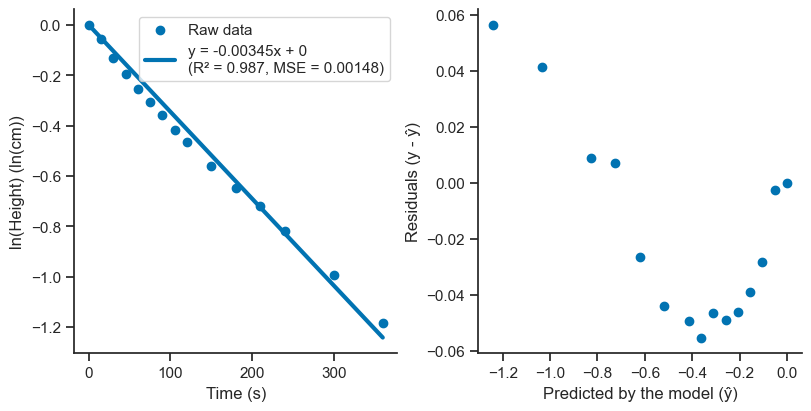

In [13]:
fig, (ax1, ax2) = plt.subplots(
    constrained_layout=True, ncols=2, figsize=(8, 4)
)
ax1.scatter(
    time,
    height_log,
    label="Raw data",
    marker="o",  # Just show the symbols and no lines
)
ax1.plot(
    time,
    y_hat_2,
    lw=3,
    label=model2_txt,
)
ax1.set(xlabel="Time (s)", ylabel="ln(Height) (ln(cm))")
ax1.legend()

ax2.scatter(y_hat_2, height_log - y_hat_2)
ax2.set(xlabel="Predicted by the model (ŷ)", ylabel="Residuals (y - ŷ)")
sns.despine(fig=fig)

#### Your answer to question 1.2(c): What value did you get for $\tau$?

<span style="color: lightgreen;"> $\tau = 290$ </span>


### 1.2(d)
[Leike](https://doi.org/10.1088/0143-0807/23/1/304) found a
value of $\tau = 276 \pm 14$s which is probably lower than the
value you found in [1.2(c)](#1.2(c)).
We will now attempt to reproduce the results of Leike by using weighted least squares regression. The motivation for using weighted least squares regression is that the errors given in the raw data are not constant. To account for this, we can use weighted least squares regression which gives more weight to data points with smaller errors.

To assign the weights ($w_i$) we can use $w_i = 1/\sigma_i^2$ where $\sigma_i$ is the
reported error for observation $i$. But we need to consider the fact that we
are now fitting log-transformed values to $y = \log (h(t) / h(0))$, and this will modify the errors.
If you are familiar with [propagation of errors](https://en.wikipedia.org/wiki/Propagation_of_uncertainty),
you should be able to show that the error in $y$ ($\sigma_y$) is given by,

\begin{equation}
\sigma_y^2 = \frac{\sigma_h^2}{h^2} ,
\end{equation}

which says that we can get the error in $y$ by dividing the measured error by the measured height.

Do the following steps to perform the weighted
least squares:

1. Calculate errors for your $y$ values according to $\sigma_y^2 = \sigma_{h}^2 / h^2$.

2. Calculate weights for your $y$ values as $1/\sigma_y^2$. Note: If
  a $\sigma_y$ value is zero, set the corresponding weight to zero.
  
3. Perform a weighted least squares fitting using the calculated weights. Estimate $\tau$, plot your new model and calculate $R^2$.

In [14]:
# # Example on how to run weighted least squares:
# model = LinearRegression(fit_intercept=False)
# # Just create some weights (not correct for 1.2(d))
# weights = 1.0 / data["height-error"].to_numpy() ** 2
# weights[weights == float("inf")] = 0  # Set infinite values to zero
# model.fit(X, height, sample_weight=weights)  # Do fitting, but use the weights
# r2 = model.score(
#     X, height, sample_weight=weights
# )  # Calculate R² (considering the weights).

In [15]:
time = data["time"].to_numpy() 
height_log = np.log( data["height"].to_numpy() ) - np.log( data["height"].to_numpy()[0] )
height_log_error =  (data["height-error"].to_numpy() **2) / (data["height"].to_numpy() **2) #sigma_y^2 

model = LinearRegression(fit_intercept=False)
X = time.reshape(-1, 1)

weights = 1 / height_log_error #1/sigma_y^2 
weights[weights == float("inf")] = 0  # Set infinite values to zero
model.fit(X, height_log, sample_weight=weights)  # Do fitting, but use the weights
r2 = model.score(X, height_log, sample_weight=weights)  # Calculate R² (considering the weights).

# We can use the model for prediction by:
y_hat = model.predict(X)

# We can calculate the mean squared error (MSE) for the model:
mse_model = mean_squared_error(height_log, y_hat)
# Summarize the model with some short text:
model_txt = f"y = {model.coef_[0]:.3g}x + {model.intercept_:.3g}"
model_txt = f"{model_txt}\n(R² = {r2:.3g}, MSE = {mse_model:.3g})"
print(model_txt)

tau = -1/model.coef_[0] 
print(tau)

y = -0.00361x + 0
(R² = 0.985, MSE = 0.00218)
277.3769166441027


C:\Users\haavarug\AppData\Local\Temp\ipykernel_18116\2339138689.py:8: RuntimeWarning: divide by zero encountered in divide
  weights = 1 / height_log_error #1/sigma_y^2


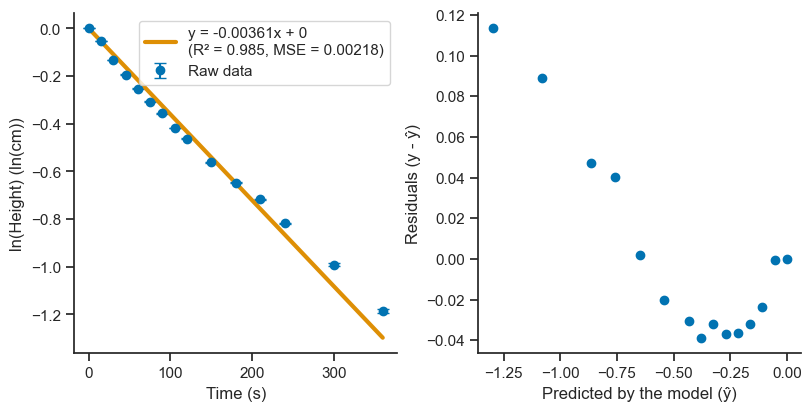

In [16]:
fig, (ax1, ax2) = plt.subplots(
    constrained_layout=True, ncols=2, figsize=(8, 4)
)
ax1.errorbar(
    time,
    height_log,
    yerr=height_log_error,
    label="Raw data",
    fmt="o",  # Just show the symbols and no lines
    capsize=4,  # Size of end of the error bars
)
ax1.plot(
    time,
    y_hat,
    lw=3,
    label=model_txt,
)
ax1.set(xlabel="Time (s)", ylabel="ln(Height) (ln(cm))")
ax1.legend()

ax2.scatter(y_hat, height_log - y_hat)
ax2.set(xlabel="Predicted by the model (ŷ)", ylabel="Residuals (y - ŷ)")
sns.despine(fig=fig)

#### Your answer to question 1.2(d): What value did you get for $\tau$? How does it compare to Leike's result?

<span style="color: lightgreen;"> $\tau = 277$, i.e., the same as Leike </span>


### 1.2(e)
We can use the measured errors to estimate the error in the $\tau$ parameter. Adopt the example code below, using [statsmodels](https://www.statsmodels.org/stable/examples/notebooks/generated/wls.html) to compute a 95% confidence interval for $\tau$.

In [17]:
# Here is some example code to help you get started with statsmodels:
import statsmodels.api as sm

X = time.reshape(-1, 1)
weights = 1.0 / data["height-error"].to_numpy() ** 2
weights[weights == float("inf")] = 0  # Set infinite values to zero

model_wls = sm.WLS(height, X, weights=weights)
results_wls = model_wls.fit()
print(results_wls.summary(alpha=0.05)) # (Setting alpha=0.05 will calculate a 100(1-alpha)% confidence interval)

                                 WLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.391
Model:                            WLS   Adj. R-squared (uncentered):              0.347
Method:                 Least Squares   F-statistic:                              8.983
Date:                Tue, 28 Jan 2025   Prob (F-statistic):                     0.00961
Time:                        14:27:31   Log-Likelihood:                            -inf
No. Observations:                  15   AIC:                                        inf
Df Residuals:                      14   BIC:                                        inf
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\haavarug\AppData\Local\Temp\ipykernel_18116\384216000.py:5: RuntimeWarning: divide by zero encountered in divide
  weights = 1.0 / data["height-error"].to_numpy() ** 2
c:\Users\haavarug\Documents\VSCode-PhD\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\haavarug\Documents\VSCode-PhD\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:806: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


**Note:** A description of the summary from statsmodels can be found in [Appendix B](#B.-The-summary-results-from-statsmodels). We only need this part:

```code
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0452      0.015      2.997      0.010       0.013       0.077
==============================================================================
```

where `coef` gives the fitted coefficient and the numbers below `[0.025      0.975]` is the confidence interval.

In [18]:
# Alternatively, we can get the confidence interval by:
results_wls.conf_int()

array([[0.01284482, 0.07749162]])

In [19]:
import statsmodels.api as sm

time = data["time"].to_numpy() 
X = time.reshape(-1, 1)

height_log = np.log( data["height"].to_numpy() ) - np.log( data["height"].to_numpy()[0] )
height_log_error =  (data["height-error"].to_numpy() **2) / (data["height"].to_numpy() **2) #sigma_y^2 


weights = 1 / height_log_error #1/sigma_y^2 
weights[weights == float("inf")] = 0  # Set infinite values to zero

model_wls = sm.WLS(height_log, X, weights=weights)
results_wls = model_wls.fit()
print(results_wls.summary(alpha=0.05)) # (Setting alpha=0.05 will calculate a 100(1-alpha)% confidence interval)
#print(results_wls.conf_int()) 

                                 WLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            WLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              2374.
Date:                Tue, 28 Jan 2025   Prob (F-statistic):                    5.00e-17
Time:                        14:27:31   Log-Likelihood:                            -inf
No. Observations:                  15   AIC:                                        inf
Df Residuals:                      14   BIC:                                        inf
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\haavarug\AppData\Local\Temp\ipykernel_18116\561558166.py:10: RuntimeWarning: divide by zero encountered in divide
  weights = 1 / height_log_error #1/sigma_y^2
c:\Users\haavarug\Documents\VSCode-PhD\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\haavarug\Documents\VSCode-PhD\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:806: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


In [20]:
conf_int = -1/np.array([-0.004, -0.003])
print(conf_int) 

[250.         333.33333333]


#### Your answer to question 1.2(e): What confidence interval did you get for $\tau$?

<span style="color: lightgreen;"> [250, 333] </span>


## Exercise 1.3: Non-linear least squares

In spectroscopy, it is often necessary to "deconvolve" a spectrum into a number of overlapping spectral peaks. The individual peaks can often be approximated as Gaussian functions of amplitude $\beta$, peak wavelength $\lambda$   and standard deviation $\sigma$. Hence, the spectrum $S(\lambda)$ may be written as, 

\begin{equation}
S(\lambda) = \sum_{i=1}^N \beta_i \text{e}^{-(\lambda - \lambda_i)^2 / 2\sigma_i^2},
\end{equation}

where $N$ is the number of overlapping peaks.


<p style="text-align: center;"><b>Table 1:</b> Parameters for spectral peaks</p>  

|             | Peak 1   | Peak 2   | Peak 3   |
|-------------|----------|----------|----------|
| $\beta_i$   | 0.2      | 0.4      | 0.3      |
| $\lambda_i$ | 4.0      | 5.5      | 7.2      |
| $\sigma_i$  | 0.5      | 0.8      | 0.9      |


We will in this exercise use non-linear least squares to determine the parameters in Table 1 for a noisy spectrum.
We will use [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) from [SciPy](https://scipy.org/) to do this. You can also use [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) from [SciPy](https://scipy.org/) for non-linear least squares: this is simpler and requires less setup, but you have less control over the optimization process.

### 1.3(a)

1. Use the parameter values in Table 1 to create a noise-free absorption spectrum $A_0 (\lambda)$ and plot it as a function of $\lambda$.
2. Simulate a noisy spectrum $A(\lambda)$ by adding Gaussian noise of amplitude (standard deviation) $\gamma=0.05$ to $A_0(\lambda)$. Plot this spectrum as well.

**Hint:** You can use [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to generate Gaussian noise. For example (to generate with a standard deviation of 0.01 with the same shape as a given matrix `mat`):
```python
np.random.normal(loc=0, scale=0.01, size=mat.shape)
```

In [21]:
# Here is some code to get you started:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.optimize import minimize

# Styling for plots:
sns.set_theme(style="ticks", context="notebook", palette="colorblind")

# For showing matplotlib in jupyter:
# (you can experiment with replacing "inline" with "notebook")
%matplotlib inline

In [22]:
# Your code here
def gaussian(x, height, center, width):
    return height*np.exp(-(x - center)**2/(2*width**2)) 
def three_gaussians(x, 
        h1, c1, w1, 
		h2, c2, w2, 
		h3, c3, w3):
    return (gaussian(x, h1, c1, w1) +
        gaussian(x, h2, c2, w2) +
        gaussian(x, h3, c3, w3)) 

param_peaks = [0.2, 4.0, 0.5, #height, center, widht 
               0.4, 5.5, 0.8, 
               0.3, 7.2, 0.9]

In [23]:
l       = np.linspace(0,10,100) 
y_ideal = three_gaussians(l, *param_peaks) 
noise   = np.random.normal(0, 0.05, l.size)
y_noise = three_gaussians(l, *param_peaks) + noise

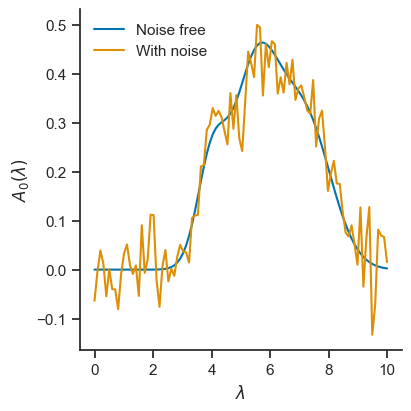

In [24]:
fig, (ax1) = plt.subplots(constrained_layout=True,ncols=1, figsize=(4, 4))

ax1.plot(l, y_ideal, label='Noise free') 
ax1.plot(l, y_noise, label='With noise') 

ax1.set(xlabel="$\lambda$", ylabel="$A_0(\lambda)$") 
ax1.legend(frameon=False)
sns.despine(fig=fig)

### 1.3(b)

Use non-linear least squares to estimate the Gaussian parameters for the noisy spectrum $A(\lambda)$ you generated in [1.3(a)](#1.3(a)). Investigate how the solution depends on your initial guess and the noise-level $\gamma$ (try at least two values for $\gamma$: 0.05 and 0.01).

**Hint:** The code below outlines how to set up and perform non-linear least squares.

In [25]:
# This example will fit data to the following function:
x = np.linspace(0, 1, 100)
y = 0.5 * np.sin(10 * x) + 2.0 * np.exp(x + 1)

# First we define the model we will fit:
def model(x, params):
    """Calculate y using the given parameters.

    Args:
        x: The independent variable.
        params: A list of parameters:

    Returns:
        The value of the function at x.
    """
    return params[0] * np.sin(params[1] * x) + params[2] * np.exp(x + params[3]) 

In [26]:
# Next, we define the objective function we will minimize:
def objective(params, x, y):
    y_fit = model(x, params)
    return np.sum((y - y_fit) ** 2)  # Return sum of squared errors

In [27]:
# Set up optimization

# Initial guess for the parameters:
initial_guess = [1.0, 20, 1.0, 2]

# Set up boundaries for the coefficients, these
# are on the form (min, max) for each parameter
bounds = [
    (0.1, 4.0),
    (1, 20.0),
    (0.1, 4.0),
    (0.1, 5),
]

result = minimize(
    objective,
    initial_guess,
    args=(x, y),
    # method="L-BFGS-B", # you can specify the method, or make SciPy choose
    bounds=bounds,
    options={
        "disp": True,
        "maxiter": 5000,
    },  # Print information, and do maximum 5000 iterations
)

[0.50000009 9.9999999  1.53759372 1.26292849]


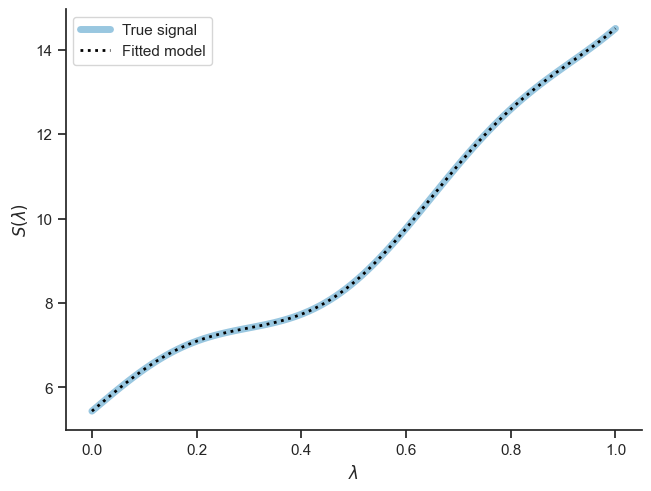

In [28]:
# Get the fitted parameters:
fit_params = result.x
print(fit_params)
# Recalculate using the fitted parameters:
y_fit = model(x, fit_params) 
# Plot the fitted signal
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(x, y, label="True signal", lw=5, alpha=0.4)
ax.plot(x, y_fit, label="Fitted model", color="black", lw=2, ls=":")
ax.set(xlabel=r"$\lambda$", ylabel=r"$S(\lambda)$")
ax.legend()
sns.despine(fig=fig)

In [29]:
# Your code here

l       = np.linspace(0,10,100) 
y_ideal = three_gaussians(l, *param_peaks) 
noise   = np.random.normal(0, 0.03, l.size)
y_noise = three_gaussians(l, *param_peaks) + noise

# First we define the model we will fit:
def model(x, params):
    """Calculate y using the given parameters.

    Args:
        x: The independent variable.
        params: A list of parameters:

    Returns:
        The value of the function at x.
    """
    return three_gaussians(x, *params) 

# Next, we define the objective function we will minimize:
def objective(params, x, y):
    y_fit = model(x, params)
    return np.sum((y - y_fit) ** 2)  # Return sum of squared errors

# Set up optimization
# Initial guess for the parameters:
initial_guess = [0.2, 4.0, 0.5, #height, center, widht 
                 0.4, 5.5, 0.8, 
                 0.3, 7.2, 0.9]
#initial_guess = [10 for i in range(len(initial_guess))]
initial_guess = [g for g in initial_guess]

# Set up boundaries for the coefficients, these
# are on the form (min, max) for each parameter
bounds_c = [(x*0.9, x*1.1) for x in initial_guess] #conservative bounds 
bounds_l = [(x/10, x*10) for x in initial_guess] #liberal bounds 

result_c = minimize(
      objective,
      initial_guess,
      args=(l, y_noise),
      # method="L-BFGS-B", # you can specify the method, or make SciPy choose
      bounds=bounds_c,
      options={
          "disp": True,
          "maxiter": 5000,
      },  # Print information, and do maximum 5000 iterations
)

result_l = minimize(
      objective,
      initial_guess,
      args=(l, y_noise),
      # method="L-BFGS-B", # you can specify the method, or make SciPy choose
      bounds=bounds_l,
      options={
          "disp": True,
          "maxiter": 5000,
      },  # Print information, and do maximum 5000 iterations
)

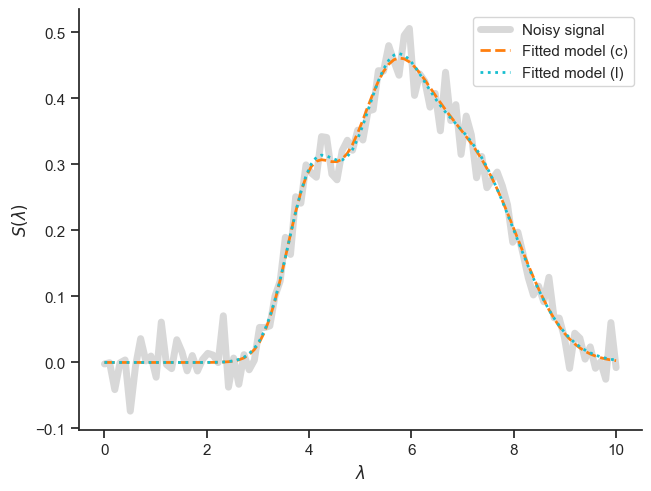

In [30]:
# Get the fitted parameters:
fit_params_c = result_c.x 
fit_params_l = result_l.x 
# Recalculate using the fitted parameters:
y_fit_c = model(l, fit_params_c) 
y_fit_l = model(l, fit_params_l) 
# Plot the fitted signal
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(l, y_noise, label="Noisy signal", color='tab:gray', lw=5, alpha=0.3)

ax.plot(l, y_fit_c, label="Fitted model (c)", color="tab:orange", lw=2, ls="--")
ax.plot(l, y_fit_l, label="Fitted model (l)", color="tab:cyan", lw=2, ls=":")

ax.set(xlabel=r"$\lambda$", ylabel=r"$S(\lambda)$")
ax.legend()
sns.despine(fig=fig)

In [31]:
print(fit_params_c)
print(fit_params_l)

[0.22       3.98608694 0.46516559 0.41001506 5.56297402 0.83474273
 0.27       7.29049344 0.8936767 ]
[0.26378878 4.05982143 0.50256265 0.35624318 5.51622074 0.68108181
 0.31773081 7.05617143 0.981906  ]


#### Your answer to question 1.3(b): What values did you find for the parameters? Do you find your parameters to depend on the initial guess and the noise amplitude?

<span style="color: lightgreen;"> 

- If the initial guess is good (in this case the exact values) and the noise is low, the bounds does not affect the fit very much. 
- If the initial guess is far off, the bounds becomes more important and should be liberal. 
    - You should make sure that you are completely certain that the true values lays inside your bunds. 
    - This is because it is rarely the case that you have a bad initial guess but good bounds close to the true values. 
- For a very noisy signal ($sigma = 1.0$), the bounds should be liberal. 
- The two first trends are in fact dependent on the exact noise generated, for a given $\sigma$ (!). 
- The initial guess should not be too far off, otherwise the fit becomes bad regardless of the bounds and noise. 

</span>

### 1.3(c)

Modify your code to use separable least squares (SLS). Investigate how the solution depends on your initial guess and the noise level ($\gamma$) (try at least two values for $\gamma$: 0.05 and 0.01).

In [32]:
# Your code here
import numpy as np 
from scipy.optimize import fmin

def gaussian(x, height, center, width): return height*np.exp(-(x - center)**2/(2*width**2)) 
def three_gaussians(x, h1,c1,w1, h2,c2,w2, h3,c3,w3):
    return (gaussian(x, h1, c1, w1) +
            gaussian(x, h2, c2, w2) +
            gaussian(x, h3, c3, w3)) 
gauss_params = [0.2, 4.0, 0.5, #height, center, width 
                0.4, 5.5, 0.8, 
                0.3, 7.2, 0.9]

l = np.linspace(0,10,100) 
y = three_gaussians(l, *param_peaks) + np.random.normal(0, 0.03, l.size)

In [33]:
def gaussfitfun(params, l, y, return_fit=False):
    m = len(l) #no. of data points 
    z = np.zeros(m) #sum of gaussians 
    for i in range(3): #i = ith gaussian
        amplitude = params[3*i]
        mean      = params[3*i + 1]
        stddev    = params[3*i + 2]
        z += gaussian(l, amplitude, mean, stddev) 
    res = np.linalg.norm(z - y)
    
    return z if return_fit else res 

In [34]:
initial_guess = [g for g in gauss_params] 
params_opt    = fmin(gaussfitfun, initial_guess, args=(l, y), maxiter=10000)

Optimization terminated successfully.
         Current function value: 0.283712
         Iterations: 511
         Function evaluations: 763


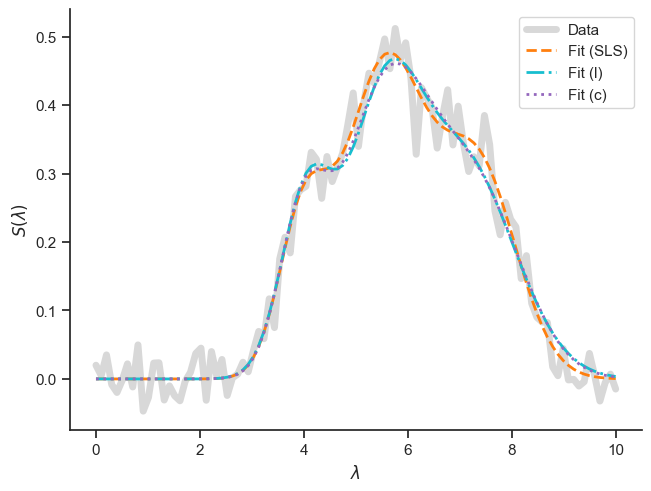

In [35]:
fig, ax = plt.subplots(constrained_layout=True)

y_fit = gaussfitfun(params_opt, l, y, return_fit=True)

ax.plot(l, y, label="Data", color='tab:gray', lw=5, alpha=0.3)
ax.plot(l, y_fit, label="Fit (SLS)", color="tab:orange", lw=2, ls="--")
ax.plot(l, y_fit_l, label="Fit (l)", color="tab:cyan", lw=2, ls="-.")
ax.plot(l, y_fit_c, label="Fit (c)", color="tab:purple", lw=2, ls=":")

ax.set(xlabel=r"$\lambda$", ylabel=r"$S(\lambda)$")
ax.legend()
sns.despine(fig=fig)

In [36]:
print('SLS \t', params_opt)
print('l \t', fit_params_l)
print('c \t',fit_params_c)

SLS 	 [0.22224967 3.99221918 0.4779418  0.45697114 5.56224152 0.78316904
 0.30438795 7.35187635 0.74358128]
l 	 [0.26378878 4.05982143 0.50256265 0.35624318 5.51622074 0.68108181
 0.31773081 7.05617143 0.981906  ]
c 	 [0.22       3.98608694 0.46516559 0.41001506 5.56297402 0.83474273
 0.27       7.29049344 0.8936767 ]


#### Your answer to question 1.3(c): What values did you find for the parameters? Do you find your parameters to depend on the initial guess and the noise amplitude? Are they different from the ones found in [1.3(b)](#1.3(b))?
*Double click here*

### 1.3(d) (Optional)

Use bootstrapping (see page 54 in our textbook) with replacement to obtain error estimates for the Gaussian parameters.

In [69]:
# Your code here
l = np.linspace(0,10,10000) 
y = three_gaussians(l, *param_peaks) + np.random.normal(0, 0.03, l.size)
initial_guess = [g for g in gauss_params] 

B = 1000 #no. of bootstrap samples to make 
n = np.size(y) #no. of data points 
G1_params = np.array([]) #gaussian 1 
G2_params = np.array([]) #gaussian 2
G3_params = np.array([]) #gaussian 3 
for b in range(B): 
    idxs = np.random.choice(np.arange(n), size=n, replace=True) #randomly sample indices 
    l_b  = l[idxs]
    y_b  = y[idxs] 
    params_opt_b = fmin(gaussfitfun, initial_guess, args=(l_b, y_b), maxiter=10000, disp=False)
    G1_params = np.append(G1_params, params_opt_b[0:3]) 
    G2_params = np.append(G2_params, params_opt_b[3:6])
    G3_params = np.append(G3_params, params_opt_b[6:9])

#compute standard error for gaussian parameters 
def calc_stderrors(gaussian_params_fit, return_params=False): 
    heights = gaussian_params_fit[::3]
    centres = gaussian_params_fit[1::3] 
    widths  = gaussian_params_fit[2::3] 

    stderr = lambda y: np.sqrt(np.sum((y - np.mean(y))**2 / (np.shape(y)[0]-1))) 
    heights_stderr = stderr(heights)
    centres_stderr = stderr(centres)
    widths_stderr  = stderr(widths)

    if return_params: return [heights, centres, widths]
    else: return [heights_stderr, centres_stderr, widths_stderr]

G1_stderrs = calc_stderrors(G1_params)
G2_stderrs = calc_stderrors(G2_params) 
G3_stderrs = calc_stderrors(G3_params) 

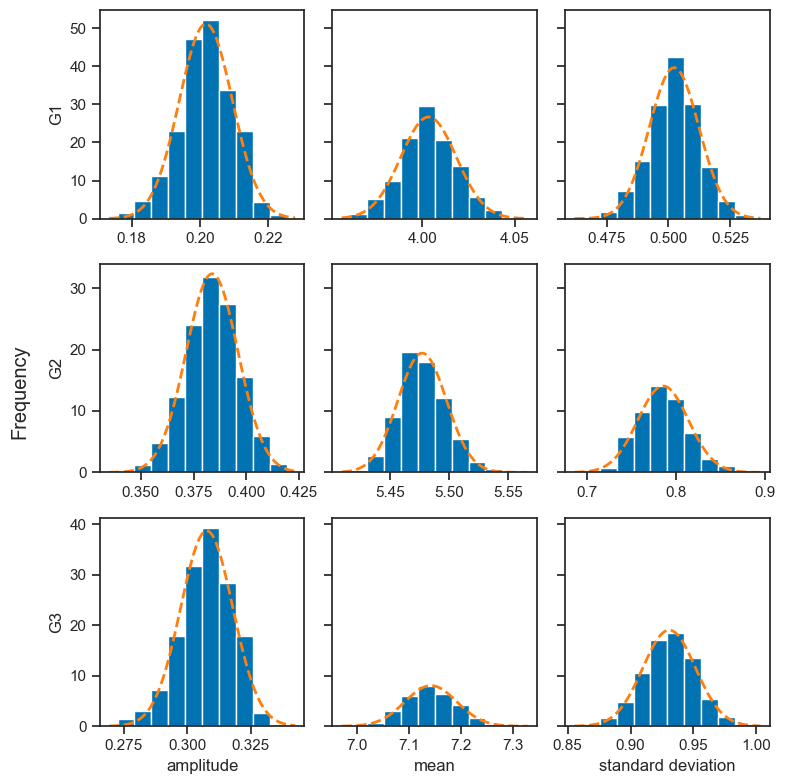

In [95]:
from scipy.stats import norm

fig, axs = plt.subplots(3, 3, figsize=(8, 8), sharey='row')

def add_pdf(ax, data): 
    x1 = np.linspace(*ax.get_xlim(), 100)
    mu, std = norm.fit(data)
    y1 = norm.pdf(x1, mu, std)
    ax.plot(x1, y1, color='tab:orange', lw=2, ls='--') 
    return mu, std 

gaussians = [G1_params, G2_params, G3_params] 
for i, G in enumerate(gaussians): 
    heights, centres, widths = calc_stderrors(G, return_params=True)

    axs[i, 0].hist(heights, bins=10, density=True)
    mu, std = add_pdf(axs[i,0], heights)
    #axs[i, 0].axvline(mu-std, color='k') 
    #axs[i, 0].axvline(mu+std, color='k') 
    
    axs[i, 1].hist(centres, bins=10, density=True)
    mu, std = add_pdf(axs[i,1], centres)
    
    axs[i, 2].hist(widths, bins=10, density=True)
    mu, std = add_pdf(axs[i,2], widths)


axs[2, 0].set_xlabel(f"amplitude")
axs[2, 1].set_xlabel(f"mean")
axs[2, 2].set_xlabel(f"standard deviation")
axs[0, 0].set_ylabel(f"G1")
axs[1, 0].set_ylabel(f"G2")
axs[2, 0].set_ylabel(f"G3")
fig.supylabel("Frequency")

plt.tight_layout()
plt.show()

In [96]:
G1_stderrs

[np.float64(0.007803254606051722),
 np.float64(0.01494891767100854),
 np.float64(0.01006366045275814)]

#### Your answer to question 1.3(d): What are your error estimates?
*Double click here*

## Your feedback for Exercise 1

We highly value your feedback as it will help us improve this exercise for future students (and also gauge the level for the following exercises). Please take a few minutes to answer the following questions:

1. Length and difficulty:
   - How long did it take you to complete this exercise?
   - On a scale of 1 to 5 (1=too short, 5=too long), how would you rate the length of the exercise?
   - What was the most challenging part of this exercise?
   - On a scale of 1 to 5 (1=too easy, 5=too difficult), how would you rate the difficulty of the exercise?
2. Example code:
   - Would you have preferred more or less example code?
   - Were there any parts of the exercise where you would have liked to see more code examples?
3. Errors and inconsistencies:
   - Did you encounter any errors or inconsistencies in the exercise instructions or data?
4. General feedback
   - How could this exercise be improved?
   - Do you have any other comments or suggestions?

# Appendix

## A. Least squares without the intercept
We are going to determine the parameter $b$ for the linear model,

\begin{equation}
y =  b x,
\end{equation}

and we do this by minimizing the sum of squared errors ($S$). With $n$
measurements of $y$ and $x$,

\begin{equation}
S = \sum_{i=1}^n (y_i - b x_i)^2 = \sum_{i=1}^n r_i^2
\end{equation}

To minimize $S$ we calculate the derivative:

\begin{equation*}
\frac{\partial S}{\partial b} = -2 \sum_{i=1}^n r_i x_i, \quad
\frac{\partial^2 S}{\partial b^2} = 2\sum_{i=1}^n x_i^2 \geq 0,
\end{equation*}

Note that the second derivative is positive, except for the
trivial case when $x_i = 0$, and we are indeed going to
find a minimum.
Requiring that $\frac{\partial S}{\partial b} = 0$ gives,

\begin{equation}
-2 \sum_{i=1}^n r_i x_i = 0 \implies \sum_{i=1}^n (y_i x_i - b x_i^2) = 0 \implies 
b = \frac{\sum_{i=1}^n y_i x_i}{\sum_{i=1}^n x_i^2} .
\end{equation}

We can also repeat this derivation for weighted least squares. The sum of squared errors
is then,

\begin{equation}
S = \sum_{i=1}^n w_i (y_i - b x_i)^2,
\end{equation}

where $w_i$ are the weights and, after minimization,

\begin{equation}
b = \frac{\sum_{i=1}^n w_i y_i x_i}{\sum_{i=1}^n w_i x_i^2} .
\end{equation}

You can find more information on the weighted least squares method (with error analysis)
in Bevington and Robinson <a name="cite_ref-1"></a>[[1]](#bevington).
Taylor <a name="cite_ref-2"></a>[[2]](#taylor) states error formulas for
the parameters that might be useful for cases when
the error in $y$ is known and constant (e.g., as in "normal" least squares).


<a name="bevington"></a>[[1]](#cite_ref-1) Philip R. Bevington and D. Keith Robinson. Data reduction and error analysis for the physical sciences. 3rd ed. New York, NY: McGraw-Hill, 2003.

<a name="taylor"></a>[[2]](#cite_ref-2) John R. Taylor. An Introduction to Error Analysis: The Study of Uncertainties in Physical
    Measurements. 2nd ed. Sausalito, CA: University Science Books, 1997.

## B. The summary results from `statsmodels`

The summary method in `statsmodels` prints out a lot of information.
We have here fitted a model $y=a + bx$ to 10 $(x, y)$ points with `statsmodels`
and the resulting summary output is printed below. This output is described in the
sections below. 

```text
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     175.6
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           1.00e-06
Time:                        08:42:06   Log-Likelihood:                -16.957
No. Observations:                  10   AIC:                             37.91
Df Residuals:                       8   BIC:                             38.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4248      0.931      4.754      0.001       2.278       6.571
x1             1.9235      0.145     13.253      0.000       1.589       2.258
==============================================================================
Omnibus:                        3.674   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.159   Jarque-Bera (JB):                0.755
Skew:                           0.464   Prob(JB):                        0.686
Kurtosis:                       3.975   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
```

### B.1. Information about the model


- **Dep. Variable:** The dependent variable (the variable we are predicting, $y$) in the model.
- **Model:** The type of model we have created (OLS = Ordinary Least Squares).
- **Method:** We have used Least squares to find the parameters.
- **Date & Time:** The date and time for when we created the model.
- **No. Observations:** The number of observations in the data set (we had 10 ($x$,$y$) values here).

### B.2. Information about the calculation
- **Df Residuals:** Degrees of freedom for the residuals (sum of squares). 
  This is equal to $n - k - 1$ where $n$ is the number of observations and $k$ is
  the number of variables. In our case: $n - k - 1 = 10 - 1 - 1 = 8$. If we did the
  fitting without the constant term (for instance, by centring the data first), this
  number would be $n-k = 10-1=9$.
- **Df Model:** Degrees of freedom for the model (number of variables in the model).
- **Covariance type:** Calculations of standard errors assume homoscedastic errors.
  If this is not the case, then the standard error is not computed correctly. There
  are alternative ways of calculating the standard error; this field tells you
  if statsmodels used a more robust method.
  
### B.3. Information about the overall quality
- **R-squared:** Coefficient of determination ($R^2$) for the model.
- **Adj. R-squared:** The adjusted $R^2$ for the model. Useful from comparing
  models as this one will only increase (when adding more variables) if the
  increase in $R^2$ is more than one would expect by chance.
- **F-statistic:** This is the result of an F-test where the null hypothesis is that all
  regression coefficients are equal to zero! Effectively, this compares the model we
  have just made to an alternative model equal to the constant intercept term. 
  To use this value, we would have to decide on a $\alpha$ level and look up a critical F-value.
  This is some extra work for us, so we typically rather focus on the **Prob (F-statistic)**.
- **Prob (F-statistic):** This is the probability of getting an **F-statistic** at
  least as extreme as the one above if all regression coefficients are zero. 
  It is also known as the $p$-value.
  If we have selected $\alpha$ value, we will reject the null hypothesis if 
  the $p$-value is smaller than $\alpha$. Here, we have a very small $p$-value, and we reject the
  null hypothesis: We conclude that at least one regression parameter is
  significant for predicting $y$.
- **Log-Likelihood:** In least squares, we are minimizing the squared error.
  This is equivalent (if the errors are normally distributed)
  to maximizing the likelihood. The value printed here is the
  logarithm of the likelihood for the model.
- **AIC and BIC:** The
  [Akaike information criterion (AIC)](https://en.wikipedia.org/wiki/Akaike_information_criterion) and
  [Bayesian information criterion (BIC)](https://en.wikipedia.org/wiki/Bayesian_information_criterion).
  These can be directly calculated from the Log-Likelihood and are useful for comparing alternative
  models. Generally, we prefer models with lower AIC and BIC.
  
### B.4. Information about the coefficients

- **coef:** The determined coefficients for the model.

- **std err:** The standard of the coefficients. This
  is calculated from,
  
  \begin{equation*}
  \text{Var}(\mathbf{b}) = s^2 \cdot \text{diag} \left(\mathbf{X}^\top \mathbf{X} \right)^{-1},
  \end{equation*}
  
  where,
  
  \begin{equation*}
  s^2 = \frac{SSE}{n - k - 1},
  \end{equation*}
  
  and $SSE$ is the sum of squared error/residuals, $n$ the number of data points (10 in this case)
  and $k$ the number of variables (1 in this case).

- **t, P>|t|, and [0.025 0.975]:** Some statistics for the
  coefficients. **t** is the $t$ statistic, which is obtained by dividing
  the coefficient by the standard error.
  This is the statistic in a test where the null hypothesis is that the coefficient is zero.
  To use the $t$ statistic we would have to consult a table with critical $t$-values for $n-k-1$
  degrees of freedom. The **P>|t|** is the $p$-value for such a $t$-test.
  Here, the $t$ statistic
  is high (and the p-value is low) and we would reject this null hypothesis for both the
  constant and x1. In other words, these coefficients are indeed different from
  zero.
  Finally, the **[0.025 0.975]**
  represents a $100(1-\alpha)\%$ confidence interval for the coefficients. We did not specify 
  $\alpha$ here, but we can give it as a parameter. The default is $\alpha=0.05$.